In [31]:
from sympy import *
from sympy.physics.mechanics import *
from IPython.display import display
import util
import math
init_vprinting()

In [32]:
h, r, pi = symbols("h r π")

func = (-r**3/(2*h**3) + (r/h)**2 + h/(2*r) -1)
const = 1/h**3
func = func * const

volume = integrate(4*pi*r**2*func, (r, 0, h))
simplify(volume)


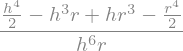

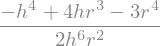

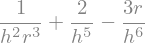

In [33]:
function, gradient, laplacian = util.get_derivatives(func, r)
display(function, gradient, laplacian)

In [34]:
h_value = 0.8 # don't use 1, casue it can't test case like 1/(h**2)
upper_bound = h_value

s = [(h, h_value), (pi, math.pi), (r, abs(r))]
f = (func/volume).subs(s)
g = (gradient/volume).subs(s)
l = (laplacian/volume).subs(s)

util.sampling(f, g, l, r, upper_bound, h_value, "samples/viscosity.json")

{'h_value': 0.8,
 'function': [(0.08, 18.69526594707874),
  (0.16, 7.16197243913529),
  (0.24, 3.4651947814783273),
  (0.32, 1.7625166549434506),
  (0.4, 0.8742642137616319),
  (0.48, 0.3978873577297388),
  (0.56, 0.1528713425206053),
  (0.64, 0.041964682260558384),
  (0.72, 0.004921783721917095)],
 'gradient': [(0.08, -290.34314539023796),
  (0.16, -70.87368559560963),
  (0.24, -29.669937002584565),
  (0.32, -14.949918055323907),
  (0.4, -8.01408862614829),
  (0.48, -4.248276475760228),
  (0.56, -2.071470922810722),
  (0.64, -0.8232654679588693),
  (0.72, -0.18816468469026074)],
 'laplacian': [(0.08, 7297.920524375223),
  (0.16, 920.8916384955857),
  (0.24, 277.8487225031953),
  (0.32, 119.66491425862338),
  (0.4, 61.92704847478226),
  (0.48, 35.186436257566925),
  (0.56, 20.512073645034206),
  (0.64, 11.315346724987787),
  (0.72, 4.894000748503327)]}

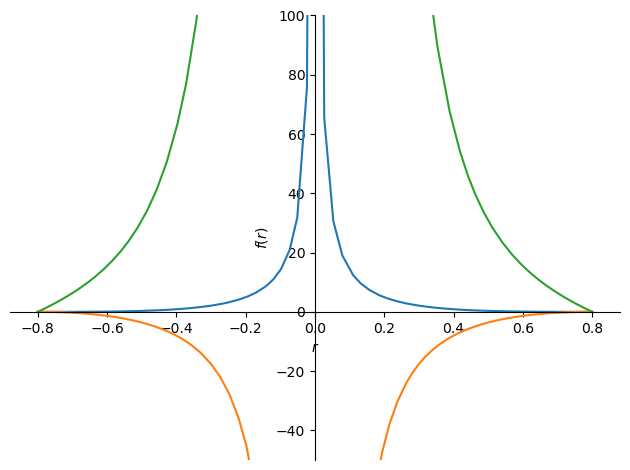

In [35]:
plot(f, g, l, (r, -upper_bound, upper_bound), ylim = (-50, 100))